# 📈 Modélisation – Régression Logistique
---

## 📦 Importation des bibliothèques

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

## 📂 Chargement du dataset

In [26]:
df = pd.read_csv("../data/processed/breast_cancer_wisconsin_selected_features.csv")
print("✅ Dataset chargé avec succès depuis data/processed/")

✅ Dataset chargé avec succès depuis data/processed/


## 🧩 Préparation des données pour la modélisation

### 🔢 Encodage de diagnosis

In [27]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

### ➗ Train / Test Split 

In [28]:
# Séparation des features et de la cible
X = df.drop("diagnosis", axis=1).values
y = df["diagnosis"].values

# Division du dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)



### 📐 Standardisation des features et harmonisation des échelles

In [29]:
# standardisation des features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 🤖 Entraînement du modèle de régression logistique

In [30]:
model = LogisticRegression(solver="liblinear", class_weight="balanced")
model.fit(X_train_scaled, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

## 🧮 Visualisation des prédictions du modéle 

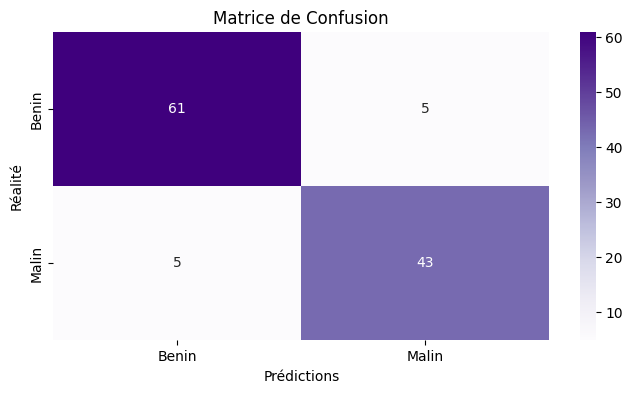

In [32]:
# Matrice de confusion sur le jeu de test
y_pred = model.predict(X_test_scaled)

# Visualisation de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 4))

sns.heatmap(cm, annot=True, fmt="d", cmap="Purples", xticklabels=["Benin", "Malin"], yticklabels=["Benin", "Malin"])
plt.xlabel("Prédictions")
plt.ylabel("Réalité")
plt.title("Matrice de Confusion")
plt.show()

### 🧮 Observation 

La matrice de confusion met en évidence une très bonne capacité du modèle à distinguer les tumeurs bénignes des tumeurs malignes.

- **Vrais négatifs (61)** : la majorité des tumeurs bénignes sont correctement classées.

- **Vrais positifs (43)** : une grande partie des tumeurs malignes est correctement détectée.

- **Faux positifs (5)** : quelques tumeurs bénignes sont classées comme malignes, ce qui peut entraîner des examens supplémentaires, mais reste acceptable dans un contexte médical.

- **Faux négatifs (5)** : un nombre limité de tumeurs malignes n’est pas détecté par le modèle, ce qui constitue le principal risque clinique.

**📌 Dans un cadre de dépistage, cette matrice montre un **bon équilibre entre sécurité et précision**, avec une capacité satisfaisante à limiter les erreurs critiques tout en maintenant une bonne performance globale.**


## 📊 Évaluation de la performance du modèle

In [33]:
print (" Métriques de performance du modèle sur le jeu de test :")
print ("="*55)

print(" 🔷 Accuracy :", accuracy_score(y_test, y_pred))
print(" 🔷 Precision :", precision_score(y_test, y_pred))
print(" 🔷 Recall :", recall_score(y_test, y_pred))
print(" 🔷 F1-score :", f1_score(y_test, y_pred))

 Métriques de performance du modèle sur le jeu de test :
 🔷 Accuracy : 0.9122807017543859
 🔷 Precision : 0.8958333333333334
 🔷 Recall : 0.8958333333333334
 🔷 F1-score : 0.8958333333333334


### 📊 Observation 

Les métriques de performance confirment la robustesse du modèle de régression logistique sur le jeu de test.

- **Accuracy (91.23 %)** : le modèle fournit une excellente performance globale avec plus de 9 prédictions correctes sur 10.

- **Precision (89.58 %)** : lorsque le modèle prédit un cancer malin, la prédiction est fiable dans près de 90 % des cas.

- **Recall / Sensibilité (89.58 %)** : le modèle parvient à détecter la majorité des cas de cancer, ce qui est essentiel dans un contexte médical.

- **F1-score (89.58 %)** : l’équilibre entre précision et rappel indique un modèle stable et bien calibré.

**🎯 Ces résultats montrent que le modèle est adapté à un objectif de prévention et d’aide au diagnostic, avec un compromis pertinent entre détection des cas graves et limitation des erreurs de classification.**


## 📈 Courbe ROC - AUC

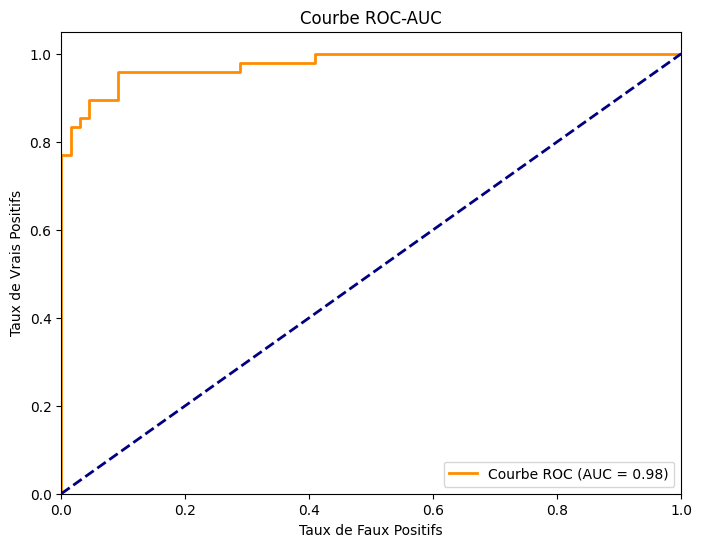

Thresholds :  [           inf 9.99999997e-01 8.17127579e-01 8.09437940e-01
 7.16615366e-01 6.84311977e-01 6.75380857e-01 6.42967286e-01
 5.81413942e-01 4.44769143e-01 3.65575756e-01 4.37600627e-02
 4.19499294e-02 1.87963790e-02 1.87822208e-02 4.00593085e-05]


In [34]:

# Calcul des points de la courbe ROC
y_prob = model.predict_proba(X_test_scaled)[:, 1]
# Calcul des taux de faux positifs et de vrais positifs
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Visualisation de la courbe ROC-AUC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="Courbe ROC (AUC = %0.2f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de Faux Positifs")
plt.ylabel("Taux de Vrais Positifs")
plt.title("Courbe ROC-AUC")
plt.legend(loc="lower right")
plt.show()

# Affichage des seuils de décisions testés automatiquement par roc_curve
print("Thresholds : ", thresholds)

### 📈 Observation

La courbe ROC met en évidence une **excellente capacité de discrimination** du modèle entre les classes bénigne et maligne.

- La courbe est très proche du coin supérieur gauche, ce qui indique :
  - un **taux de vrais positifs élevé**
  - pour un **faible taux de faux positifs**

- La diagonale représente un classifieur aléatoire ; le modèle s’en éloigne très nettement.

#### 🔢 **AUC = 0.98**

- Une AUC proche de 1 signifie que le modèle classe correctement les observations dans **98 % des cas**, indépendamment du seuil de décision.

- Cela confirme que les variables sélectionnées contiennent une information discriminante très forte.

#### 🎯 **Interprétation métier**

Dans un contexte médical :

- le modèle est capable de **prioriser correctement les patients à risque**

- il offre une grande flexibilité dans le choix du seuil de décision selon l’objectif :
  - maximiser la détection des cancers (sensibilité)
  - ou limiter les faux positifs (spécificité)

#### 🧩 **Conclusion**

La courbe ROC-AUC valide la qualité globale du modèle et confirme que la sélection des variables et la préparation des données ont permis d’obtenir un classifieur fiable, robuste et pertinent pour une application de dépistage du cancer.


## 💾 Sauvegarde du modéle et du Scaler 

In [35]:
import joblib
joblib.dump(model, "../models/logistic_regression_model.pkl")
joblib.dump(scaler, "../models/standard_scaler.pkl")
print("✅ Modèle et scaler sauvegardés dans le dossier models/")

✅ Modèle et scaler sauvegardés dans le dossier models/


## 🚀 Utilisation du modèle pour une prédiction

In [38]:
%run ../app.py

Bienvenue dans l'outil de prédiction du diagnostic du cancer du sein.
Résultat de la prédiction : MALIN
